In [56]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scienceplots
from scipy import integrate 

In [2]:
plt.style.use(['science','notebook'])

In [176]:
def function (omega, z_arr): # define our function: f(Omega, z)

    output = [0]*int(len(z_arr))
    for i in range (npoints):
        output[i] = (omega*(1 + z_arr[i])**3 + (1 - omega)*(1 + z_arr[i])**(3/2))**(-1/2)
    
    return output

In [170]:
def omega_0_analytic (z_arr): # analytical integral of the function at Omega = 0
    return 4*(z_arr + 1)**(1/4) - 4

In [171]:
def omega_1_analytic (z_arr): # analytical integral of the function at Omega = 1
    return -2*(z_arr + 1)**(-1/2) + 2

In [177]:
z = np.linspace(0,1,81)[:-1] # create our array of z values

In [168]:
omega_0 = function(0, z) # evaluate function at different Omega values
omega_03 = function(0.3, z)
omega_07 = function(0.7, z)
omega_1 = function(1, z)

In [169]:
int_omega_0 = integrate.cumulative_trapezoid(y = omega_0, x = z) # numerically integrate with trapezoid method
int_omega_03 = integrate.cumulative_trapezoid(y = omega_03, x = z)
int_omega_07 = integrate.cumulative_trapezoid(y = omega_07, x = z)
int_omega_1 = integrate.cumulative_trapezoid(y = omega_1, x = z)

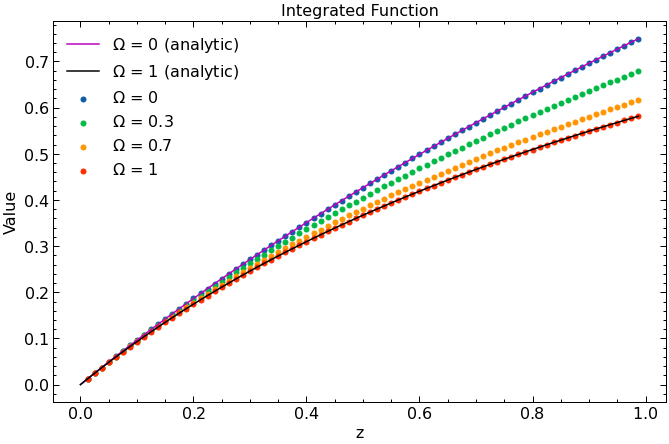

In [178]:
# plot numerically and analytically integrated functions as a function of z 

size = 25

plt.figure(figsize=(11,7))
plt.plot(z, omega_0_analytic(z), "m-", linewidth = 1.5, label = r"$\Omega$ = 0 (analytic)")
plt.plot(z, omega_1_analytic(z), "k-", linewidth = 1.5, label = r"$\Omega$ = 1 (analytic)")
plt.scatter(x = z[1:], y = int_omega_0, s = size, label = r"$\Omega$ = 0")
plt.scatter(x = z[1:], y = int_omega_03, s = size, label = r"$\Omega$ = 0.3")
plt.scatter(x = z[1:], y = int_omega_07, s = size, label = r"$\Omega$ = 0.7")
plt.scatter(x = z[1:], y = int_omega_1, s = size, label = r"$\Omega$ = 1")

plt.title("Integrated Function")
plt.xlabel("z")
plt.ylabel("Value")
plt.legend()
plt.show()